In [1]:
import pandas as pd
import numpy as np

#### Dataset
https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset?select=diabetes_binary_5050split_health_indicators_BRFSS2015.csv

1. Diabetes_012: 0 = sem diabetes; 1 = pré-diabetes; 2 = diabete
2. HighBP: 0 = sem PA elevada; 1 = PA alta (PA = Pressão Alta)
3. HighChol: 0 = sem colesterol alto; 1 = colesterol alto
4. CholCheck: 0 = sem verificação de colesterol em 5 anos; 1 = sim verificação de colesterol em 5 anos
5. BMI: Índice de Massa Corporal (12 a 98)
6. Smoker: Você fumou pelo menos 100 cigarros em toda a sua vida? [Nota: 5 maços = 100 cigarros] 0 = não; 1 = sim
7. Stroke: você teve um derrame. 0 = não; 1 = sim
8. HeartDiseaseorAttack: doença coronariana (DAC) ou infarto do miocárdio (IM) 0 = não; 1 = sim
9. PhysActivity: atividade física nos últimos 30 dias - não inclui trabalho. 0 = não; 1 = sim
10. Fruits: Consumir Fruta 1 ou mais vezes por dia. 0 = não; 1 = sim
11. Veggies: Consumir Legumes 1 ou mais vezes por dia. 0 = não; 1 = sim
12. HvyAlcoholConsump: (homens adultos >=14 doses por semana e mulheres adultas>=7 doses por semana). 0 = não; 1 = sim
13. AnyHealthcare: Possui algum tipo de cobertura de saúde, incluindo plano de saúde, planos pré-pagos como HMO, etc. 0 = não; 1 = sim
14. NoDocbcCost: Houve um momento nos últimos 12 meses em que você precisou consultar um médico, mas não pôde devido ao custo? 0 = não; 1 = sim
15. GenHlth: Você diria que em geral sua saúde é: escala 1-5; 1 = excelente; 2 = muito bom; 3 = bom; 4 = justo; 5 = pobre
16. MentHlth: dias de saúde mental ruim escala 1-30 dias
17. PhysHlth: dias de doença física ou lesão nos últimos 30 dias escala 1-30
18. DiffWalk: Você tem sérias dificuldades para caminhar ou subir escadas? 0 = não; 1 = sim
19. Sex: 0 = feminino; 1 = masculino
20. Age: categoria de idade de 13 níveis (_AGEG5YR consulte o livro de códigos) 1 = 18-24; 9 = 60-64; 13 = 80 ou mais
21. Education: Nível de escolaridade (EDUCA ver livro de códigos) escala 1-6; 1 = Nunca frequentou a escola ou apenas o jardim de infância; 2 = fundamental etc
22. Income: Escala de renda (INCOME2 ver livro de códigos) escala 1-8; 1 = menos de $10.000; 5 = menos de $35.000; 8 = $75.000 ou mais



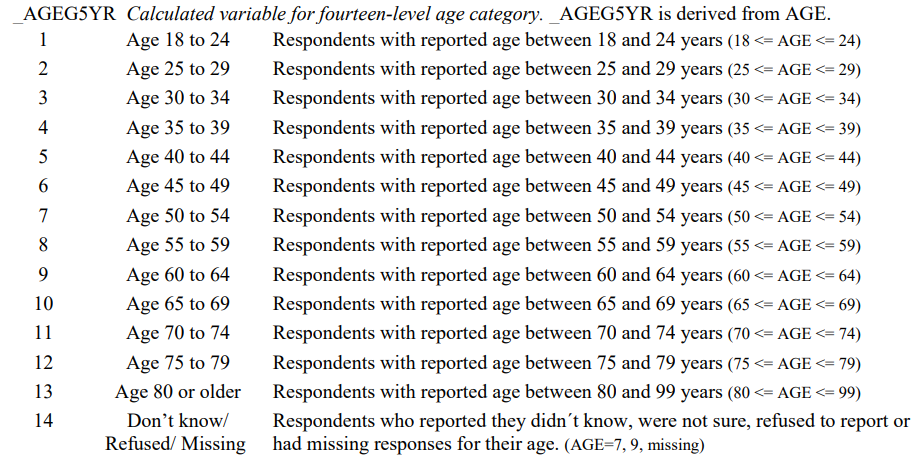

In [2]:
from PIL import Image
img = Image.open('../imgs/_AGEG5YR.png')
img

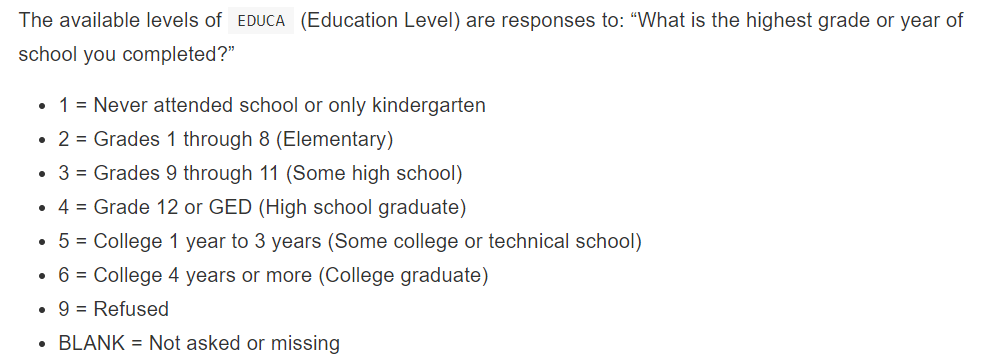

In [3]:
from PIL import Image
img = Image.open('../imgs/EDUCA.png')
img

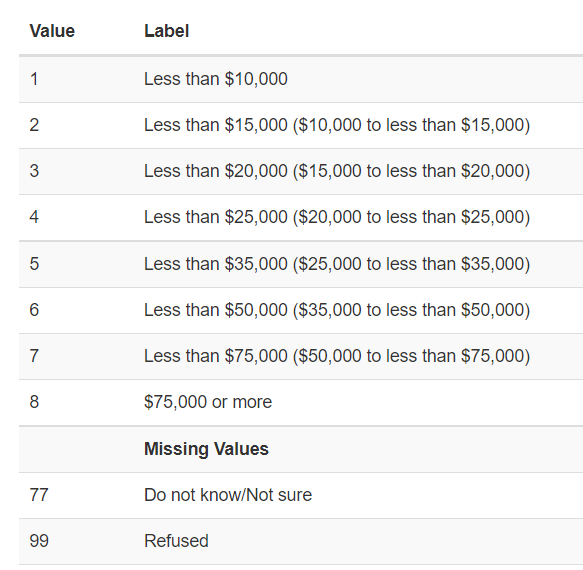

In [4]:
from PIL import Image
img = Image.open('../imgs/INCOME2.png')
img

#### Reduzir uso de memória

In [5]:
def pre_processar(csv_file):
    types={'Sex':'uint16', 'Fruits':'uint16', 'Diabetes_012':'uint16', 'HighBP':'uint16',  'HighChol':'uint16',  'CholCheck':'uint16',  'Smoker':'uint16', 'Stroke':'uint16', 'HeartDiseaseorAttack':'uint16', 'PhysActivity':'uint16', 'Fruits':'uint16', 'Veggies':'uint16', 'HvyAlcoholConsump':'uint16',  'AnyHealthcare':'uint16', 'NoDocbcCost':'uint16', 'GenHlth':'uint16', 'MentHlth':'uint16', 'PhysHlth':'uint16', 'DiffWalk':'uint16', 'Sex':'uint16', 'Age':'uint16', 'Education':'uint16', 'BMI':'uint16', 'Income':'uint16'}
    df = pd.read_csv(csv_file, dtype=types)
    return df

#### Lendo CSV ou Binário/pikle

In [6]:
from pathlib import Path
def read_data(dataset_path, dir="../database"):
    db_path = Path(f'{dir}/{dataset_path}')

    csv_file = db_path.parent/db_path.with_suffix('.csv').name
    pkl_file = db_path.parent/db_path.with_suffix('.pkl').name 

    if(pkl_file.exists()): #Quando existir, fazer a leitura do binário
        print('Lendo pkl')
        return pd.read_pickle(pkl_file)
    else:
        print('Lendo CSV')
        df = pre_processar(csv_file) #Fazer os devidos pré-processamentos do CSV
        df.to_pickle(pkl_file) #Salvando em binário
        return df

In [7]:
df = read_data('diabetes')
df.info(memory_usage='deep')

Lendo pkl
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   Diabetes_012          253680 non-null  uint16
 1   HighBP                253680 non-null  uint16
 2   HighChol              253680 non-null  uint16
 3   CholCheck             253680 non-null  uint16
 4   BMI                   253680 non-null  uint16
 5   Smoker                253680 non-null  uint16
 6   Stroke                253680 non-null  uint16
 7   HeartDiseaseorAttack  253680 non-null  uint16
 8   PhysActivity          253680 non-null  uint16
 9   Fruits                253680 non-null  uint16
 10  Veggies               253680 non-null  uint16
 11  HvyAlcoholConsump     253680 non-null  uint16
 12  AnyHealthcare         253680 non-null  uint16
 13  NoDocbcCost           253680 non-null  uint16
 14  GenHlth               253680 non-null  uint16
 15  MentHlt

Uso de memória do data set é de 42.6 MB e foi reduzido para 10.6 MB. A estratégia base foi trasnformar os dados reais/float, em inteiros positivos de 16 bits, uma vez que, para qualquer atributo, os valores minímos são maiores ou igual a zero e máximos são também baixos, abaixo de 100. Veja:

In [8]:
features = df.columns
print('MÍNIMO =< FEATURE <=  MÁXIMO')
for feature in features:
    print(f'{df[feature].min()} <= {feature} <= {df[feature].max()}')

MÍNIMO =< FEATURE <=  MÁXIMO
0 <= Diabetes_012 <= 2
0 <= HighBP <= 1
0 <= HighChol <= 1
0 <= CholCheck <= 1
12 <= BMI <= 98
0 <= Smoker <= 1
0 <= Stroke <= 1
0 <= HeartDiseaseorAttack <= 1
0 <= PhysActivity <= 1
0 <= Fruits <= 1
0 <= Veggies <= 1
0 <= HvyAlcoholConsump <= 1
0 <= AnyHealthcare <= 1
0 <= NoDocbcCost <= 1
1 <= GenHlth <= 5
0 <= MentHlth <= 30
0 <= PhysHlth <= 30
0 <= DiffWalk <= 1
0 <= Sex <= 1
1 <= Age <= 13
1 <= Education <= 6
1 <= Income <= 8


In [9]:
df.columns

Index(['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [10]:
df.shape

(253680, 22)

In [11]:
print(f"""HÁ DADOS FALTANTES? {df.isnull().sum().any()}
HÁ DADOS NaN? {df.isna().sum().any()} 
""")

HÁ DADOS FALTANTES? False
HÁ DADOS NaN? False 



O data set oriundo da kaggle já veio tratado e portanto não há dados nulos ou faltantes

In [12]:
df.duplicated().sum()
#df.drop_duplicates(inplace=True)

23899

O data set possui linhas/registros duplicados, no entanto, como não há nenhum identificador único para cada paciente, a duplicação pode ser apenas o registro para um novo paciente. Em razão disso, optei por não removê-los

#### Estatistica

In [13]:
df.describe()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.296921,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.698160,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,2.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [14]:
df.Income.unique()

array([3, 1, 8, 6, 4, 7, 2, 5], dtype=uint16)

In [15]:
df.MentHlth.describe()

count    253680.000000
mean          3.184772
std           7.412847
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max          30.000000
Name: MentHlth, dtype: float64

### TRANSFORMAÇÃO DOS DADOS PARA FACILITAR A CONSTRUÇÃO DA VISUALIZAÇÃO

Criando uma cópia com o significado de cada categoria. Deixará a visualização mais intuitiva (com nome das classes, ao invés de numeros)

In [16]:
valores_unicos = {}
for col in df.columns:
    valores_unicos[col] = df[col].value_counts().shape[0]
pd.DataFrame(valores_unicos, index=['Quatidade de valores únicos']).transpose()

,Quatidade de valores únicos
Diabetes_012,3
HighBP,2
HighChol,2
CholCheck,2
BMI,84
Smoker,2
Stroke,2
HeartDiseaseorAttack,2
PhysActivity,2
Fruits,2


In [22]:
df_vis=df.copy()

def to_category(column, condilist, choicelist):
    pass
    # column = 'Diabetes_012'
    # condlist = [df_vis[column] == n for n in range(3)]

df_vis.Diabetes_012 = np.select(
    condlist=[
        df_vis.Diabetes_012 == 0,
        df_vis.Diabetes_012 == 1,
        df_vis.Diabetes_012 == 2,
    ],
    choicelist=[
        'Saudável',
        'Diabético',
        'Pré Diabético'
    ]
)

df_vis.Diabetes_012.unique()

array(['Saudável', 'Diabético', 'Pré Diabético'], dtype=object)

In [45]:
#Até que ponto é aceitável/sugerido fazer a transformação?
df_vis=df.copy()

#Diabetes
df_vis.Diabetes_012[df_vis['Diabetes_012'] == 0] = 'Saudável'
df_vis.Diabetes_012[df_vis['Diabetes_012'] == 1] = 'Pré Diabético'
df_vis.Diabetes_012[df_vis['Diabetes_012'] == 2] = 'Diabético'

#Pressão/HighBP
df_vis.HighBP[df_vis['HighBP'] == 0] = 'Pressão Normal'
df_vis.HighBP[df_vis['HighBP'] == 1] = 'Pressão Alta'

#Colesterol/HighChol
df_vis.HighChol[df_vis['HighChol'] == 0] = 'Colesterol Normal'
df_vis.HighChol[df_vis['HighChol'] == 1] = 'Colesterol Alto'

#Exame de Colesterol/CholCheck
df_vis.CholCheck[df_vis['CholCheck'] == 0] = 'NÃO Fez checkup de Colesterol nos últimos 5 anos'
df_vis.CholCheck[df_vis['CholCheck'] == 1] = 'Fez checkup de Colesterol nos últimos 5 anos'

#Fumante/Smoker
df_vis.Smoker[df_vis['Smoker'] == 0] = 'Não'
df_vis.Smoker[df_vis['Smoker'] == 1] = 'Sim'

#AVC/Stroke
df_vis.Stroke[df_vis['Stroke'] == 0] = 'Não'
df_vis.Stroke[df_vis['Stroke'] == 1] = 'Sim'

#Ataque cardíaco/HeartDiseaseorAttack
df_vis.HeartDiseaseorAttack[df_vis['HeartDiseaseorAttack'] == 0] = 'Não'
df_vis.HeartDiseaseorAttack[df_vis['HeartDiseaseorAttack'] == 1] = 'Sim'

#Atividade física/PhysActivity
df_vis.PhysActivity[df_vis['PhysActivity'] == 0] = 'Não'
df_vis.PhysActivity[df_vis['PhysActivity'] == 1] = 'Sim'

#Cosumo de frutas/Fruits
df_vis.Fruits[df_vis['Fruits'] == 0] = 'Não'
df_vis.Fruits[df_vis['Fruits'] == 1] = 'Sim'

#Consumo de vegetais
df_vis.Veggies[df_vis['Veggies'] == 0] = 'Não'
df_vis.Veggies[df_vis['Veggies'] == 1] = 'Sim'

#Cosumo de bebidas alcólicas/HvyAlcoholConsump
df_vis.HvyAlcoholConsump[df_vis['HvyAlcoholConsump'] == 0] = 'Não'
df_vis.HvyAlcoholConsump[df_vis['HvyAlcoholConsump'] == 1] = 'Sim'

#Plano de saúde/AnyHealthcare
df_vis.AnyHealthcare[df_vis['AnyHealthcare'] == 0] = 'Não'
df_vis.AnyHealthcare[df_vis['AnyHealthcare'] == 1] = 'Sim'

#Sem acesso a plano por questões fiancneiras/NoDocbcCost
df_vis.NoDocbcCost[df_vis['NoDocbcCost'] == 0] = 'Não'
df_vis.NoDocbcCost[df_vis['NoDocbcCost'] == 1] = 'Sim'

#Auto avaliação da Saúde/GenHlth
df_vis.GenHlth[df_vis['GenHlth'] == 1] = 'Excelente'
df_vis.GenHlth[df_vis['GenHlth'] == 2] = 'Muito Boa'
df_vis.GenHlth[df_vis['GenHlth'] == 3] = 'Boa'
df_vis.GenHlth[df_vis['GenHlth'] == 4] = 'Razoável'
df_vis.GenHlth[df_vis['GenHlth'] == 5] = 'ruim'

#Dificuldades para caminhar
df_vis.DiffWalk[df_vis['DiffWalk'] == 0] = 'Não'
df_vis.DiffWalk[df_vis['DiffWalk'] == 1] = 'Sim'

#Genero/Sex
df_vis.Sex[df_vis['Sex'] == 0] = 'Feminino'
df_vis.Sex[df_vis['Sex'] == 1] = 'Masculino'

#Nível de escolaridade

df_vis.Education[df_vis['Education'] == 1] = 'Nunca Frequentou a Escola'
df_vis.Education[df_vis['Education'] == 2] = 'Ensino fundamental'
df_vis.Education[df_vis['Education'] == 3] = 'Alguma escola secundária'
df_vis.Education[df_vis['Education'] == 4] = 'Formado no ensino médio'
df_vis.Education[df_vis['Education'] == 5] = 'Alguma faculdade ou escola técnica'
df_vis.Education[df_vis['Education'] == 6] = 'Graduado da Faculdade'

#
df_vis.Income.loc[df_vis['Income'] == 1] = 'Menos de $10.000'
df_vis.Income.loc[df_vis['Income'] == 2] = 'Entre $10.000 e $14.999'
df_vis.Income.loc[df_vis['Income'] == 3] = 'Entre $15.000 e $19.999'
df_vis.Income.loc[df_vis['Income'] == 4] = 'Entre $20.000 e $24.999'
df_vis.Income.loc[df_vis['Income'] == 5] = 'Entre $25.000 e $34.999'
df_vis.Income.loc[df_vis['Income'] == 6] = 'Entre $35.000 e $49.999'
df_vis.Income.loc[df_vis['Income'] == 7] = 'Entre $50.000 e $74.999'
df_vis.Income.loc[df_vis['Income'] == 8] = '$75,000 ou mais'

<ipython-input-45-27383c7a77eb>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_vis.HighBP[df_vis['HighBP'] == 0] = 'Pressão Normal'
<ipython-input-45-27383c7a77eb>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_vis.HighChol[df_vis['HighChol'] == 0] = 'Colesterol Normal'
<ipython-input-45-27383c7a77eb>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_vis.CholCheck[df_vis['CholCheck'] == 0] = 'NÃO Fez checkup de Colestero

In [28]:
features = df_vis.columns
for feature in features:
    print(f'{df_vis[feature].unique()}')

['Saudável' 'Diabético' 'Pré Diabético']
[1 0]
[1 0]
[1 0]
[40 25 28 27 24 30 34 26 33 21 23 22 38 32 37 31 29 20 35 45 39 19 47 18
 36 43 55 49 42 17 16 41 44 50 59 48 52 46 54 57 53 14 15 51 58 63 61 56
 74 62 64 66 73 85 60 67 65 70 82 79 92 68 72 88 96 13 81 71 75 12 77 69
 76 87 89 84 95 98 91 86 83 80 90 78]
[1 0]
[0 1]
[0 1]
[0 1]
[0 1]
[1 0]
[0 1]
[1 0]
[0 1]
[5 3 2 4 1]
[18  0 30  3  5 15 10  6 20  2 25  1  4  7  8 21 14 26 29 16 28 11 12 24
 17 13 27 19 22  9 23]
[15  0 30  2 14 28  7 20  3 10  1  5 17  4 19  6 12 25 27 21 22  8 29 24
  9 16 18 23 13 26 11]
[1 0]
[0 1]
[ 9  7 11 10  8 13  4  6  2 12  5  1  3]
[4 6 3 5 2 1]
['Entre $15.000 e $19.999' 'Menos de $10.000' '$75,000 ou mais'
 'Entre $35.000 e $49.999' 'Entre $20.000 e $24.999'
 'Entre $50.000 e $74.999' 'Entre $10.000 e $14.999'
 'Entre $25.000 e $34.999']


#### Visualização

In [20]:
#Diabéticos por faixa de idade
df[df.Diabetes_012==1].groupby(by=['Age']).Age.count()

Age
1      21
2      54
3      72
4     142
5     163
6     312
7     418
8     550
9     702
10    697
11    602
12    445
13    453
Name: Age, dtype: int64

In [31]:
import matplotlib.pyplot as plt
import numpy as np

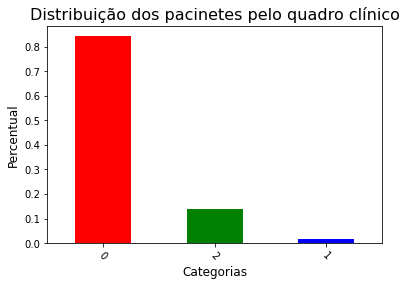

In [33]:
#Distribuição dos dados - dataset Desbalanceado
df_vis['Diabetes_012'].value_counts(normalize=True).plot(kind='bar', color=['r','g','b'])
plt.title('Distribuição dos pacinetes pelo quadro clínico', fontsize = 16)
plt.xlabel('Categorias', fontsize=12)
plt.ylabel('Percentual', fontsize = 12)
plt.xticks(rotation=-45)

#Como coloar uma cor para cada um?
#Como colocar os rótulos?
plt.show()

A base é super desbalanceada. Menos de 20% dos pacientes tem diabetes

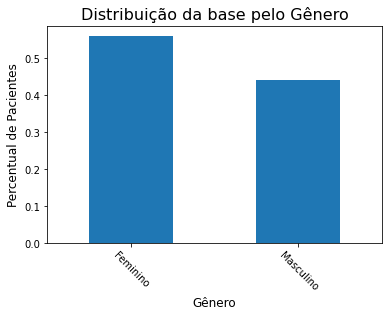

In [71]:
#Distribuição de registros por sexo
df_vis['Sex'].value_counts(normalize=True).plot(kind='bar')
plt.title('Distribuição da base pelo Gênero', fontsize = 16)
plt.xlabel('Gênero', fontsize=12)
plt.ylabel('Percentual de Pacientes', fontsize = 12)
plt.xticks(rotation=-45)
plt.show()

Quanto ao gênero, a base está relativamente balaceada, se olhando isoladamente apenas o Gênero

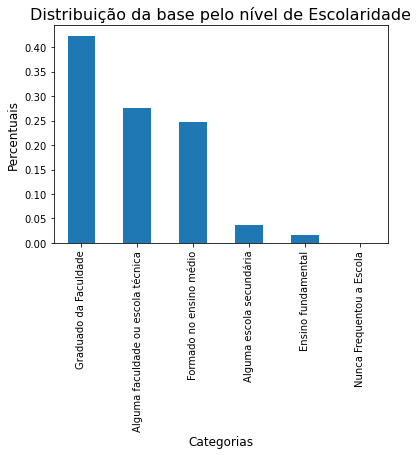

In [68]:
#Concetração por níveis de educação
df_vis['Education'].value_counts(normalize=True).plot(kind='bar')
plt.title('Distribuição da base pelo nível de Escolaridade', fontsize = 16)
plt.xlabel('Categorias', fontsize=12)
plt.ylabel('Percentuais', fontsize = 12)
#plt.xticks(rotation=-45)
plt.show()

A base é composta em sua maioria por pessoas que concluiram o ensino médio ou foram além disso.

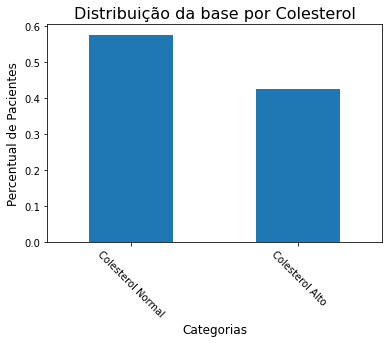

In [60]:
#Análise do colesterol
df_vis['HighChol'].value_counts(normalize=True).plot(kind='bar');
plt.title('Distribuição da base por Colesterol', fontsize = 16)
plt.xlabel('Categorias', fontsize=12)
plt.ylabel('Percentual de Pacientes', fontsize = 12)
plt.xticks(rotation=-45)
plt.show()

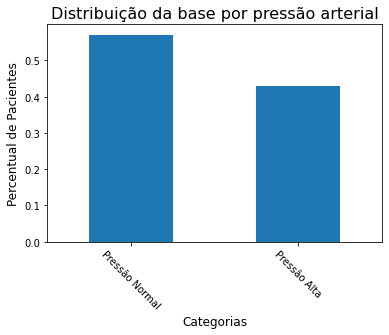

In [61]:
#Análise de pressão alta
df_vis['HighBP'].value_counts(normalize=True).plot(kind='bar');
plt.title('Distribuição da base por pressão arterial', fontsize = 16)
plt.xlabel('Categorias', fontsize=12)
plt.ylabel('Percentual de Pacientes', fontsize = 12)
plt.xticks(rotation=-45)
plt.show()

Quanto à pressão, a base está relativamente balaceada, se olhando isoladamente apenas o atributo pressão. A maior parte das pessoas tem pressão normal

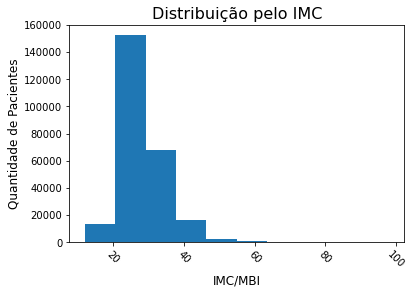

In [63]:
#O IMC de muitos entrevistados fica entre a faixa de 20 a 30
plt.hist(df['BMI'], bins=10);
plt.title('Distribuição pelo IMC', fontsize = 16)
plt.xlabel('IMC/MBI', fontsize=12)
plt.ylabel('Quantidade de Pacientes', fontsize = 12)
plt.xticks(rotation=-45)
plt.show()

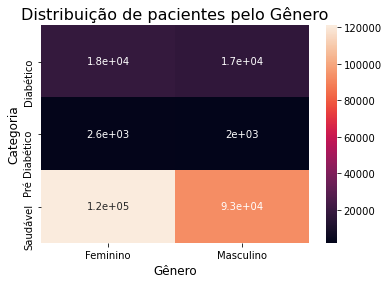

In [67]:
import seaborn as sns
#Quão balanceado está em relação ao diabetes
sns.heatmap(pd.crosstab(df_vis['Diabetes_012'], df_vis['Sex']), annot=True);
plt.title('Distribuição de pacientes pelo Gênero', fontsize = 16)
plt.xlabel('Gênero', fontsize=12)
plt.ylabel('Categoria', fontsize = 12)
plt.show()

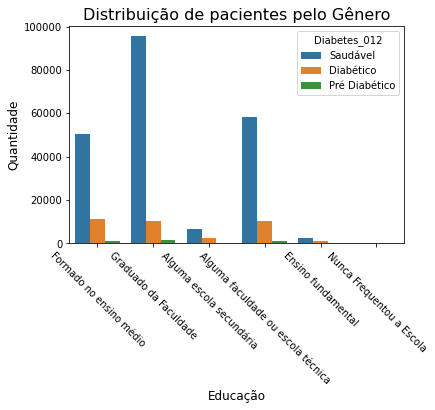

In [74]:
#O nível baixo de escolaridade do entrevistado não é realmente determinante para não ter diabetes.
sns.countplot(x='Education', hue='Diabetes_012', data=df_vis);
plt.title('Distribuição de pacientes pelo Gênero', fontsize = 16)
plt.xlabel('Educação', fontsize=12)
plt.ylabel('Quantidade', fontsize = 12)
plt.xticks(rotation=-45)
plt.show()